**Group Members**:
- Afonso Cadete | 20211519@novaims.unl.pt
- Catarina Oliveira | 20211616@novaims.unl.pt
- Joana Rosa | 20211516@novaims.unl.pt
- Rita Centeno | 20211579@novaims.unl.pt

# 5. Jupyter Notebook - Explore2
## Joint Feature Discrimination

In this semifinal notebook, the main goal is to assess the features' joint discrimination ability, while being able to:
- perform deep exploration of a small set of features of the dataset;
- find out a set of representative characteristics of the respondents;
- computation of the maximum expected profit.

In [1]:
# Library Importation
import pandas as pd

In [2]:
# Importation of the extracted dataset

# This path should be changed into the path where the Excel document was stored.
path = 'C:\\Users\\joana\\Documents\\Joana Rita\\Universidade\\Data Science\\Year 2\\1st Semester\\Programming for Data Science\\1st Project\\'

# Reads the Excel document and defines that the 'ID' column is the index of the dataset
data_original = pd.read_excel(path + "4Explore1.xlsx", index_col = 'ID')

# Creates a copy of the imported data, so that the original one is never changed
data=data_original.copy()

# Calls the head of the dataset, to ensure the import was correctly done.
data.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,NCatalogPurchases,Response1,...,Response5,Response,Education,MaritalStatus,FamilySize,MntTotal,%IncomeSpent,TotalPurchases,TotalResponses,NDaysPurchase
ID,,,,,,,,,,,,,,,,,,,,,
5314,40689.0,270,3,27,39,6,99,69,1,0,...,0,0,Graduation,Together,3,345,0.424,13,0,92
2493,61286.0,356,0,107,19,9,117,34,1,0,...,0,0,Graduation,Married,3,491,0.401,16,0,66
4931,157146.0,1,0,1725,2,1,1,13,28,0,...,0,0,Graduation,Together,2,1729,0.550,28,0,41
1100,41275.0,24,4,22,0,2,9,33,1,0,...,0,0,Master,Together,5,52,0.063,7,0,118
7224,31353.0,10,0,10,3,1,7,24,1,0,...,0,0,Graduation,Married,3,24,0.038,4,0,228


 In the last notebook the following features were considered to have a good influence on the response (target), when analyzed individually.

 # Categoricals

| Feature | Influence |
|--- |---|
| MaritalStatus | As 'single' the better |
| Education | As 'higher' the better |
| Responses | All are good with 1, 2 and 5 being the best |
|FamilySize| The lowest the better |

# Numericals

|Features| Analysis of group by Response | Analysis of SMD | Way of Influence |
| --- | ---| ---| ---|
|Income or %IncomeSpent| Keep | Drop | The highest the better |
|Recency | Keep | Keep |The lower the better|
|NCatalogPurchases| Keep | Keep |The highest the better |
|NDaysPurchases | Keep | Keep |  The lower the better |
|TotalPurchases | Keep | Keep | The higher the better |
| Mnt | Keep | Keep | All Mnt features are good, with MntMeatProducts, MntWines and MntTotal being the better |


### Multivariate Analysis of Categorical Variables

However, a feature that can perform well individually might not be so good when combined to others. Therefore, a multivariate analysis of categorical variables is needed to check the best possible combinations of features and its values.

In [3]:
# Values of rate and count
rate = 0.35
count = 9
# Best feature combination
by_cols1 = ['FamilySize', 'Education', 'TotalResponses']
# Statistics to be used
stats = ['mean', 'sum', 'count']

# Groupping by the answers of the features selected
gb_obj = data.groupby(by_cols1)
data_agg = gb_obj.agg({'Response': stats})

# Defining the conditions
response_large = data_agg[('Response', 'mean')] > rate
response_rel = data_agg[('Response', 'count')] > count

# Dataset respecting the conditions imposed
data_agg = data_agg.loc[response_large & response_rel, :]
g1_idx = data_agg.index

data_agg

Response          
                                          mean sum count
FamilySize Education  TotalResponses                    
1          Graduation 1               0.600000  12    20
           Master     1               0.538462   7    13
           PhD        0               0.400000  12    30
                      1               0.500000   7    14
2          Graduation 3               0.666667   8    12
           PhD        1               0.400000   8    20
                      2               0.500000   6    12
3          PhD        1               0.480000  12    25

After several combinations between different sets of features, the best combination of categorical features that maximize the profit, with some degree of representativity were `FamilySize`, `Education`and `TotalResponses`.

The combination of these features was better when:
- Family Size was 1, 2 or 3. With the biggest amount of combinations having a family size 1, and decreasing while the number of family members increases. It's important to notice that one of the variables that was not included (MaritalStatus) was the source of FamilySize, which might explain why profit decreases when it is added to the combination.
- Combined with the family size, education level concerned as minimum degree: graduation with the most combinations being PhD.
- Total responses of the customers who reunited the two other conditions, were more commonly 1.

All of these conditions were to expect after the individual analysis, except for the total responses in which one would expect it to be higher. However there were fewer customers to combine all these features and still answer 1 in the response target which would remove representativity and precision.

### Multivariate Analysis of Numerical Variables

In order to decrease the set of possible values in the numeric features, these had to be changed into intervals turning these features into categorical ones. The following cell divided these values in 5 intervals for each feature.

In [4]:
# Numerical features with multiple unique values
num_features = ['MntTotal', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'NCatalogPurchases', 'NDaysPurchase', 'TotalPurchases', 'Income', '%IncomeSpent']

#Number of intervals defined and division
n_bins, data_bin = 5, {}
for f in num_features:
    data_bin[f] = pd.qcut(data[f], q=n_bins, duplicates='drop')

# Adding the Response
data_bin['Response'] = data['Response']
data_bin = pd.DataFrame.from_dict(data_bin)
display(data_bin.shape, data_bin.head(3))

(2036, 12)

,MntTotal,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds,NCatalogPurchases,NDaysPurchase,TotalPurchases,Income,%IncomeSpent,Response
ID,,,,,,,,,,,,
5314,"(181.0, 577.0]","(85.0, 284.0]","(1.0, 5.0]","(12.0, 36.0]","(5.0, 14.0]","(71.0, 249.0]","(-0.001, 1.0]","(74.0, 121.0]","(9.0, 15.0]","(32313.0, 44635.0]","(0.209, 0.495]",0
2493,"(181.0, 577.0]","(284.0, 582.0]","(-0.001, 1.0]","(36.0, 110.0]","(5.0, 14.0]","(71.0, 249.0]","(-0.001, 1.0]","(55.0, 74.0]","(15.0, 20.0]","(58330.0, 71853.0]","(0.209, 0.495]",0
4931,"(1101.0, 2491.0]","(-0.001, 16.0]","(-0.001, 1.0]","(297.0, 1725.0]","(-0.001, 1.0]","(-0.001, 6.0]","(5.0, 28.0]","(25.999, 55.0]","(20.0, 32.0]","(71853.0, 666666.0]","(0.495, 0.793]",0


Before reaching the best set of combinations, one tried to check the influence of the Monetary Features in the `Response` (Target)
One interesting way to visualize how the Monetary features influence the Response is to plot it into a parallel coordinates graph, like it was done in the following cell.

<AxesSubplot:>

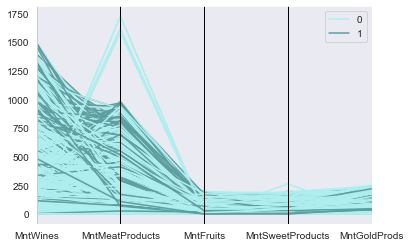

In [5]:
# Parallel Coordinates Graph
features = ["MntWines", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntGoldProds", "Response"]
pd.plotting.parallel_coordinates(data[features], 'Response', color=["paleturquoise", "cadetblue"])

Analyzing the graph above, it's possible to see that MntWines and MntProducts were the features with the biggest amount of 1 in the `Response`(target).

Nevertheless, it is still necessary to check how the set of numerical features (divided in bins) behaves when combined. The following cell represents the set of numerical features for which the best profit was achieved.

In [6]:
# Values of rate and count
rate = 0.3
count = 9

# Best feature combination
by_cols2 = ['MntGoldProds', 'TotalPurchases','%IncomeSpent', 'MntTotal']

# Groupping by the answers of the features selected
gb_obj = data_bin.groupby(by_cols2)
data_agg = gb_obj.agg({'Response': stats})

# Defining the conditions
response_large = data_agg[('Response', 'mean')] > rate
response_rel = data_agg[('Response', 'count')] > count

# Dataset respecting the conditions imposed
data_agg = data_agg.loc[response_large & response_rel , :]
g2_idx = data_agg.index

data_agg


Response      \
                                                                   mean sum   
MntGoldProds  TotalPurchases %IncomeSpent    MntTotal                         
(16.0, 34.0]  (15.0, 20.0]   (0.793, 35.329] (1101.0, 2491.0]  0.470588  16   
              (20.0, 32.0]   (0.793, 35.329] (1101.0, 2491.0]  0.323529  11   
(34.0, 71.0]  (5.0, 9.0]     (0.209, 0.495]  (43.0, 181.0]     0.416667   5   
              (9.0, 15.0]    (0.793, 35.329] (1101.0, 2491.0]  0.500000   6   
              (20.0, 32.0]   (0.793, 35.329] (1101.0, 2491.0]  0.428571  15   
(71.0, 249.0] (9.0, 15.0]    (0.793, 35.329] (1101.0, 2491.0]  0.545455  12   
              (20.0, 32.0]   (0.495, 0.793]  (1101.0, 2491.0]  0.400000   4   
                             (0.793, 35.329] (1101.0, 2491.0]  0.377358  20   

                                                                     
                                                              count  
MntGoldProds  TotalPurchases %IncomeSpent    MntTotal                
(16.0, 34.0]  (15.0, 20.0]   (0.793, 35.329] (1101.0, 2491.0]    34  
              (20.0, 32.0]   (0.793, 35.329] (1101.0, 2491.0]    34  
(34.0, 71.0]  (5.0, 9.0]     (0.209, 0.495]  (43.0, 181.0]       12  
              (9.0, 15.0]    (0.793, 35.329] (1101.0, 2491.0]    12  
              (20.0, 32.0]   (0.793, 35.329] (1101.0, 2491.0]    35  
(71.0, 249.0] (9.0, 15.0]    (0.793, 35.329] (1101.0, 2491.0]    22  
              (20.0, 32.0]   (0.495, 0.793]  (1101.0, 2491.0]    10  
                             (0.793, 35.329] (1101.0, 2491.0]    53

The best combination of numerical features were `MntGoldProds`, `TotalPurchases`, `%IncomeSpent`and `MntTotal`.

- Since MntTotal is one of the features which has a bigger amount of higher correlations with other features, it holds on a lot of information on the customers.

- MntGolProds is also an important feature to be included since it is not included in the MntTotal and the products which are covered by this feature are the more expensive ones (which, of course, will increase profit).
-
- %IncomeSpent is highly correlated with MntTotal, however it does add a lot more information by combining Income with MntTotal that is important to compute profit.

- TotalPurchases is highly correlated with NCatalogPurchases (which was one of the best individual features) wih NStorePurchases and NWebPurchases, holding on a lot of information about where the customer most buy from.

These 4 features end up to combine information of almost all the important features considered on the individual analysis and due to that, maximized the profit.

To have only the important features as columns, the ones that were not considered in the previous cells were dropped from the dataset, in the next cell.

In [7]:
# adding the features chosen + the response to a list
by_cols = by_cols1 + by_cols2 + ['Response']
# if the feature is not on the previous made list, it should be dropped
for feature in data.columns:
    if feature not in by_cols:
            data.drop(feature, axis = 1, inplace = True)

data.head()

,MntGoldProds,Response,Education,FamilySize,MntTotal,%IncomeSpent,TotalPurchases,TotalResponses
ID,,,,,,,,
5314,99,0,Graduation,3,345,0.424,13,0
2493,117,0,Graduation,3,491,0.401,16,0
4931,1,0,Graduation,2,1729,0.550,28,0
1100,9,0,Master,5,52,0.063,7,0
7224,7,0,Graduation,3,24,0.038,4,0


After removing the features which were considered to influence less the `response`, the best combination of both categorical and numerical features were put together in order to reach the number of customers that gather the best conditions (now on referred as 'best customers') and to check how many of those customer actually answered 1 on the `response`(target).

In [8]:
conditions = []
for g_idx, df_g in zip([g1_idx, g2_idx], [data, data_bin]):
    condition_g = None
    for idx in zip(g_idx.values):  
        condition_i = None
        for i, c in zip(idx[0], g_idx.names):    
            condition_i = df_g[c]==i if condition_i is None else (condition_i) & (df_g[c]==i)

        condition_g = condition_i if condition_g is None else (condition_g) | (condition_i)
        
    conditions.append(condition_g)


# Unique IDs of the 'Best customers'
un_ids = list(set(list(data[conditions[0]].index) + list(data_bin[conditions[1]].index)))
# Subset customers
data_ = data.loc[un_ids]
#Computing True and False Positives
TP = data_.Response.sum()
FP = len(data_) - TP

print("Total number of customers: {} Number of customers who answered 1: {} Response Mean: {:.2f}".format(len(data), data.Response.sum(), data.Response.mean()))
print("Total number of 'best customers': {} Number of the 'best customers' that answered 1: {} Response Mean: {:.2f}".format(len(data_), data_.Response.sum(), data_.Response.mean()))

Total number of customers: 2036 Number of customers who answered 1: 307 Response Mean: 0.15
Total number of 'best customers': 324 Number of the 'best customers' that answered 1: 143 Response Mean: 0.44


Having the ids, and the number of the 'Best Customers' are now gathered the conditions to calculate profit. In this specific case, the number of True Positives, which are the 'best customers' that actually answered 1 to the target, was 143, with the response mean being 0.44. The False Positives are the difference between the total number of 'best customers' and the true positives (324 - 143 = 181).

In [9]:
data_ #Confirming the 'best customers' dataframe

,MntGoldProds,Response,Education,FamilySize,MntTotal,%IncomeSpent,TotalPurchases,TotalResponses
ID,,,,,,,,
1,37,1,Graduation,1,540,0.473,17,1
8204,17,0,High School,2,1302,0.834,17,0
4114,32,0,Master,2,1661,1.049,28,0
8213,35,1,High School,3,61,0.210,7,0
2072,34,1,PhD,3,1030,0.965,15,1
...,...,...,...,...,...,...,...,...
6086,48,0,Graduation,2,1332,0.828,23,1
1993,19,0,PhD,3,953,0.813,14,1
4058,45,0,PhD,1,766,0.625,21,1


### Set of best features

The final set of best features was considered the following:

<b> >> MntGoldProds, Education, FamilySize, MntTotal, %IncomeSpent, totalPurchases and TotalResponses << </b>

### Profit Computation

Maximize the Profit is, of course, the main goal of this work. Combining the best features with a good rate and a representative count was essential to reach a good amount of profit.

Profit Computation was performed with the following formula:

$$p = rTP − c(TP + FP)$$

$(p)$ - profit
$(c)$ - cost of contact
$(r)$ - return
$(TP)$ - True Positives
$(FP)$ - False Positives

The following function is able to compute the profit just by calling it with the numbers of revenue, cost, False Positives and True Positives. These values were already given in the above cells, but for better readibility are here described:
- Revenue: 11
- Cost: 3
- False Positives: 181
- True Positives: 143

In [10]:
# Profit computation Function
def profit(revenue, cost, FalsePositives, TruePositives):
    profit =  revenue * TruePositives - cost*(TruePositives + FalsePositives)
    print('Profit:', profit)

profit(11, 3, FP, TP)

Profit: 601


The profit achieved was 601 monetary units (M.U) which is an incredible and very positive change compared to the company's previous revenue of -3046 M.U.

Finally, the data set with the 'best customers' is created in the following cell.

In [11]:
data_.to_excel(path + "respondents.xlsx")